In [1]:
import glob,os,functools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/v2/results/*_nonCenter_*_20200506_*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_nonCenter_p1e-06_20200506_500PCs.spearmanr.tsv
all_beta_nonCenter_p1e-06_20200506_100PCs.spearmanr.tsv
all_beta_nonCenter_p0001_20200506_100PCs.spearmanr.tsv
all_beta_nonCenter_p0001_20200506_500PCs.spearmanr.tsv
all_beta_nonCenter_p1e-05_20200506_300PCs.spearmanr.tsv
all_beta_nonCenter_p001_20200506_300PCs.spearmanr.tsv
all_beta_nonCenter_p001_20200506_100PCs.spearmanr.tsv
all_beta_nonCenter_p00001_20200506_500PCs.spearmanr.tsv
all_beta_nonCenter_p0001_20200506_300PCs.spearmanr.tsv
all_beta_nonCenter_p00001_20200506_100PCs.spearmanr.tsv
all_beta_nonCenter_p1e-05_20200506_100PCs.spearmanr.tsv
all_beta_nonCenter_p1e-05_20200506_500PCs.spearmanr.tsv
all_beta_nonCenter_p001_20200506_500PCs.spearmanr.tsv
all_beta_nonCenter_p00001_20200506_300PCs.spearmanr.tsv
all_beta_nonCenter_p1e-06_20200506_300PCs.spearmanr.tsv


In [7]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-14].replace('_20200506','').replace('_nonCenter','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [8]:
train=pd.DataFrame(functools.reduce(lambda x,y:pd.merge(x,y,left_index=True,right_index=True),
                                    [datas[ds]['TRAIN_'+kind] for ds in datas]))
train.columns=[ds for ds in datas]
train.head()

,beta_p1e-06_500PC,beta_p1e-06_100PC,beta_p0001_100PC,beta_p0001_500PC,beta_p1e-05_300PC,beta_p001_300PC,beta_p001_100PC,beta_p00001_500PC,beta_p0001_300PC,beta_p00001_100PC,beta_p1e-05_100PC,beta_p1e-05_500PC,beta_p001_500PC,beta_p00001_300PC,beta_p1e-06_300PC
PHE,,,,,,,,,,,,,,,
BIN1210,-0.006737,-0.008113,0.003722,0.003080,-0.008109,0.013948,0.013136,-0.000410,0.003076,-0.000250,-0.008432,-0.008024,0.013977,-0.000458,-0.006765
BIN1677,-0.013445,-0.000778,-0.005636,0.012184,-0.001654,0.011946,-0.006225,0.006456,0.011986,-0.005825,-0.008029,-0.004143,0.011830,0.004340,0.000959
BIN1920,0.021771,0.021423,0.008632,0.008617,0.007032,0.022702,0.020944,0.007514,0.008635,0.007619,0.006663,0.007050,0.022697,0.007484,0.021741
BIN1930,0.008458,0.008537,0.001948,0.002072,0.007964,0.013257,0.014262,0.010317,0.002112,0.010613,0.007984,0.007935,0.013208,0.010339,0.008449
BIN1940,0.013485,0.014015,0.007212,0.006736,0.003884,0.022806,0.023076,0.005452,0.006723,0.005769,0.004145,0.003934,0.022814,0.005509,0.013492


In [9]:
test=pd.DataFrame(functools.reduce(lambda x,y:pd.merge(x,y,left_index=True,right_index=True),
                                    [datas[ds]['TRAIN_'+kind] for ds in datas]))
test.columns=[ds for ds in datas]
test.head()

,beta_p1e-06_500PC,beta_p1e-06_100PC,beta_p0001_100PC,beta_p0001_500PC,beta_p1e-05_300PC,beta_p001_300PC,beta_p001_100PC,beta_p00001_500PC,beta_p0001_300PC,beta_p00001_100PC,beta_p1e-05_100PC,beta_p1e-05_500PC,beta_p001_500PC,beta_p00001_300PC,beta_p1e-06_300PC
PHE,,,,,,,,,,,,,,,
BIN1210,-0.006737,-0.008113,0.003722,0.003080,-0.008109,0.013948,0.013136,-0.000410,0.003076,-0.000250,-0.008432,-0.008024,0.013977,-0.000458,-0.006765
BIN1677,-0.013445,-0.000778,-0.005636,0.012184,-0.001654,0.011946,-0.006225,0.006456,0.011986,-0.005825,-0.008029,-0.004143,0.011830,0.004340,0.000959
BIN1920,0.021771,0.021423,0.008632,0.008617,0.007032,0.022702,0.020944,0.007514,0.008635,0.007619,0.006663,0.007050,0.022697,0.007484,0.021741
BIN1930,0.008458,0.008537,0.001948,0.002072,0.007964,0.013257,0.014262,0.010317,0.002112,0.010613,0.007984,0.007935,0.013208,0.010339,0.008449
BIN1940,0.013485,0.014015,0.007212,0.006736,0.003884,0.022806,0.023076,0.005452,0.006723,0.005769,0.004145,0.003934,0.022814,0.005509,0.013492


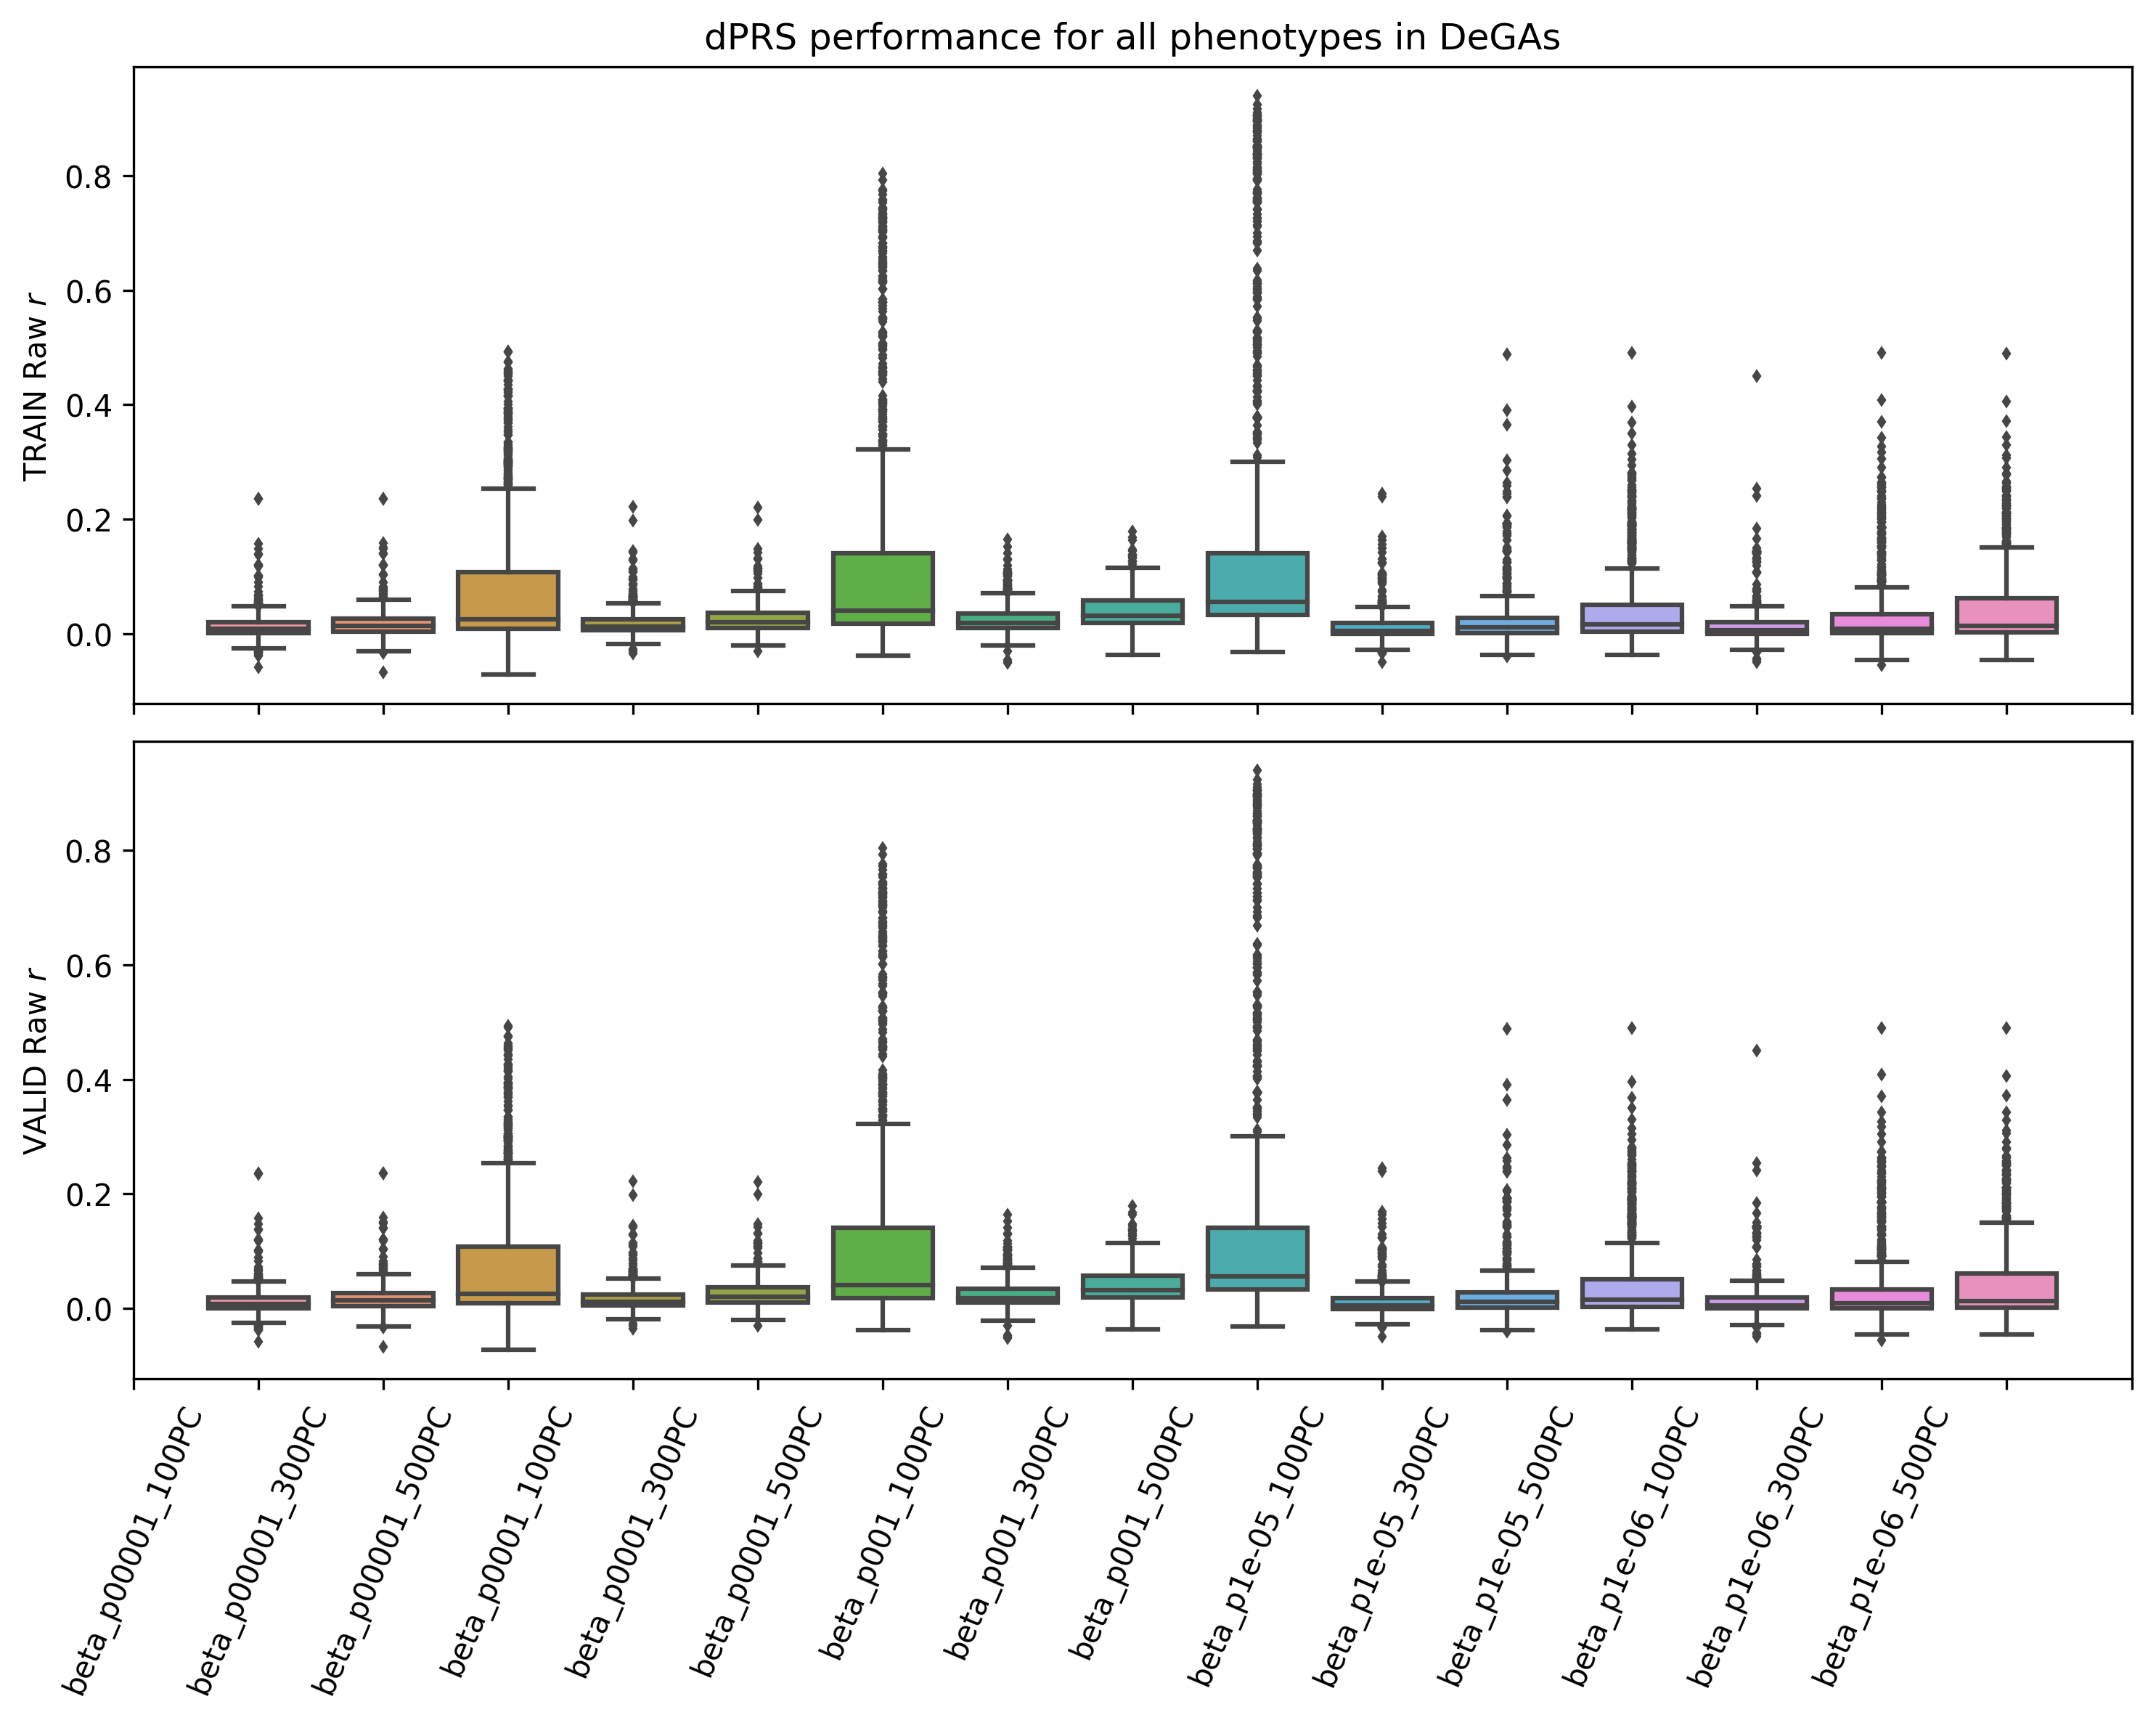

In [10]:
fig=plt.figure(figsize=(10,8),dpi=300)

# train
ax=plt.subplot(211)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')

# valid
ax=plt.subplot(212)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
            #showfliers=0, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(map(lambda s:'**'+s if s=='z_p001_300PC' else s, 
                       map(lambda i:str(i.get_text()), ax.get_xticklabels())), rotation=67)
ax.set_xlabel('')
ax.set_ylabel(' '.join(['VALID',kind.lower().capitalize(),'$r$']))
fig.tight_layout()
plt.show()

In [11]:
test.mean().sort_values()[::-1]

beta_p001_500PC      0.176875
beta_p0001_500PC     0.130436
beta_p00001_500PC    0.078790
beta_p1e-05_500PC    0.047854
beta_p1e-06_500PC    0.045279
beta_p001_300PC      0.039842
beta_p1e-06_300PC    0.036814
beta_p0001_300PC     0.025519
beta_p001_100PC      0.024958
beta_p1e-05_300PC    0.024002
beta_p0001_100PC     0.017586
beta_p00001_300PC    0.017091
beta_p1e-06_100PC    0.014621
beta_p00001_100PC    0.012271
beta_p1e-05_100PC    0.011359
dtype: float64

In [12]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

WilcoxonResult(statistic=46276.0, pvalue=9.228503865507173e-95)

In [13]:
datas['beta_p1e-06_500PC'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI20030790,0.489480,0.502534
INI10030840,0.406149,0.408669
INI20030660,0.371410,0.380914
INI30100,0.342789,0.335756
QT_FC1001717,0.329003,0.328159


In [14]:
datas['beta_p1e-06_500PC'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI20030790,0.489480,0.502534
INI10030840,0.406149,0.408669
INI20030660,0.371410,0.380914
INI30100,0.342789,0.335756
QT_FC1001717,0.329003,0.328159


In [15]:
pd.DataFrame([datas[d].loc['INI21001',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
beta_p001_500PC,0.413388,0.225298
beta_p0001_500PC,0.290456,0.192666
beta_p00001_500PC,0.218103,0.163386
beta_p1e-05_500PC,0.177577,0.143085
beta_p1e-06_300PC,0.164119,0.138538
beta_p1e-06_500PC,0.143153,0.114382
beta_p1e-05_300PC,0.045705,0.031130
beta_p001_300PC,0.036532,0.028530
beta_p001_100PC,0.032436,0.026109
beta_p0001_300PC,0.021423,0.016620


In [16]:
overfit={dgs:pearsonr(datas[dgs].dropna()['TRAIN_'+kind],
                      datas[dgs].dropna()['TEST_'+kind]) for dgs in datas}

pd.DataFrame(overfit, index=['r','p']).T.sort_values('r')[::-1]

,r,p
beta_p1e-06_300PC,0.970677,0.000000e+00
beta_p1e-06_500PC,0.947771,0.000000e+00
beta_p1e-05_300PC,0.901167,0.000000e+00
beta_p1e-06_100PC,0.896493,3.742697e-275
beta_p1e-05_500PC,0.762098,6.050316e-185
beta_p1e-05_100PC,0.643933,1.067945e-114
beta_p00001_100PC,0.607338,1.530095e-99
beta_p00001_300PC,0.563909,4.238412e-83
beta_p0001_100PC,0.492197,9.557990e-61
beta_p00001_500PC,0.440095,1.525727e-47


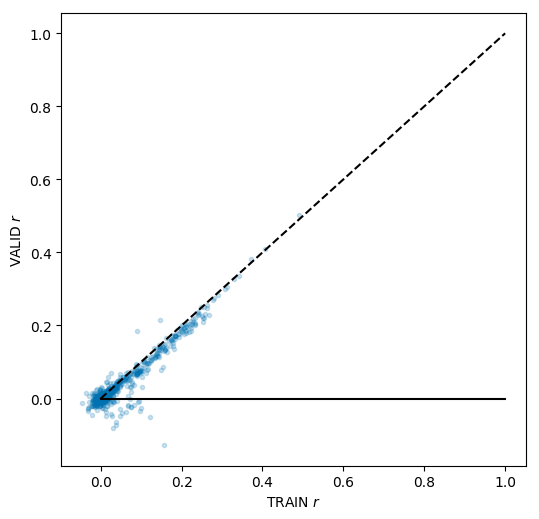

In [17]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['beta_p1e-06_500PC']['TRAIN_'+kind], 
         datas['beta_p1e-06_500PC']['TEST_'+kind], '.', alpha=0.2)
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('VALID '+'$r$')
plt.show()

In [18]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/v2/tsvd/*_nonCenter_*_20200506_*500PCs.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_beta_nonCenter_p0001_20200506_500PCs.npz
all_beta_nonCenter_p1e-06_20200506_500PCs.npz
all_beta_nonCenter_p1e-05_20200506_500PCs.npz
all_beta_nonCenter_p001_20200506_500PCs.npz
all_beta_nonCenter_p00001_20200506_500PCs.npz


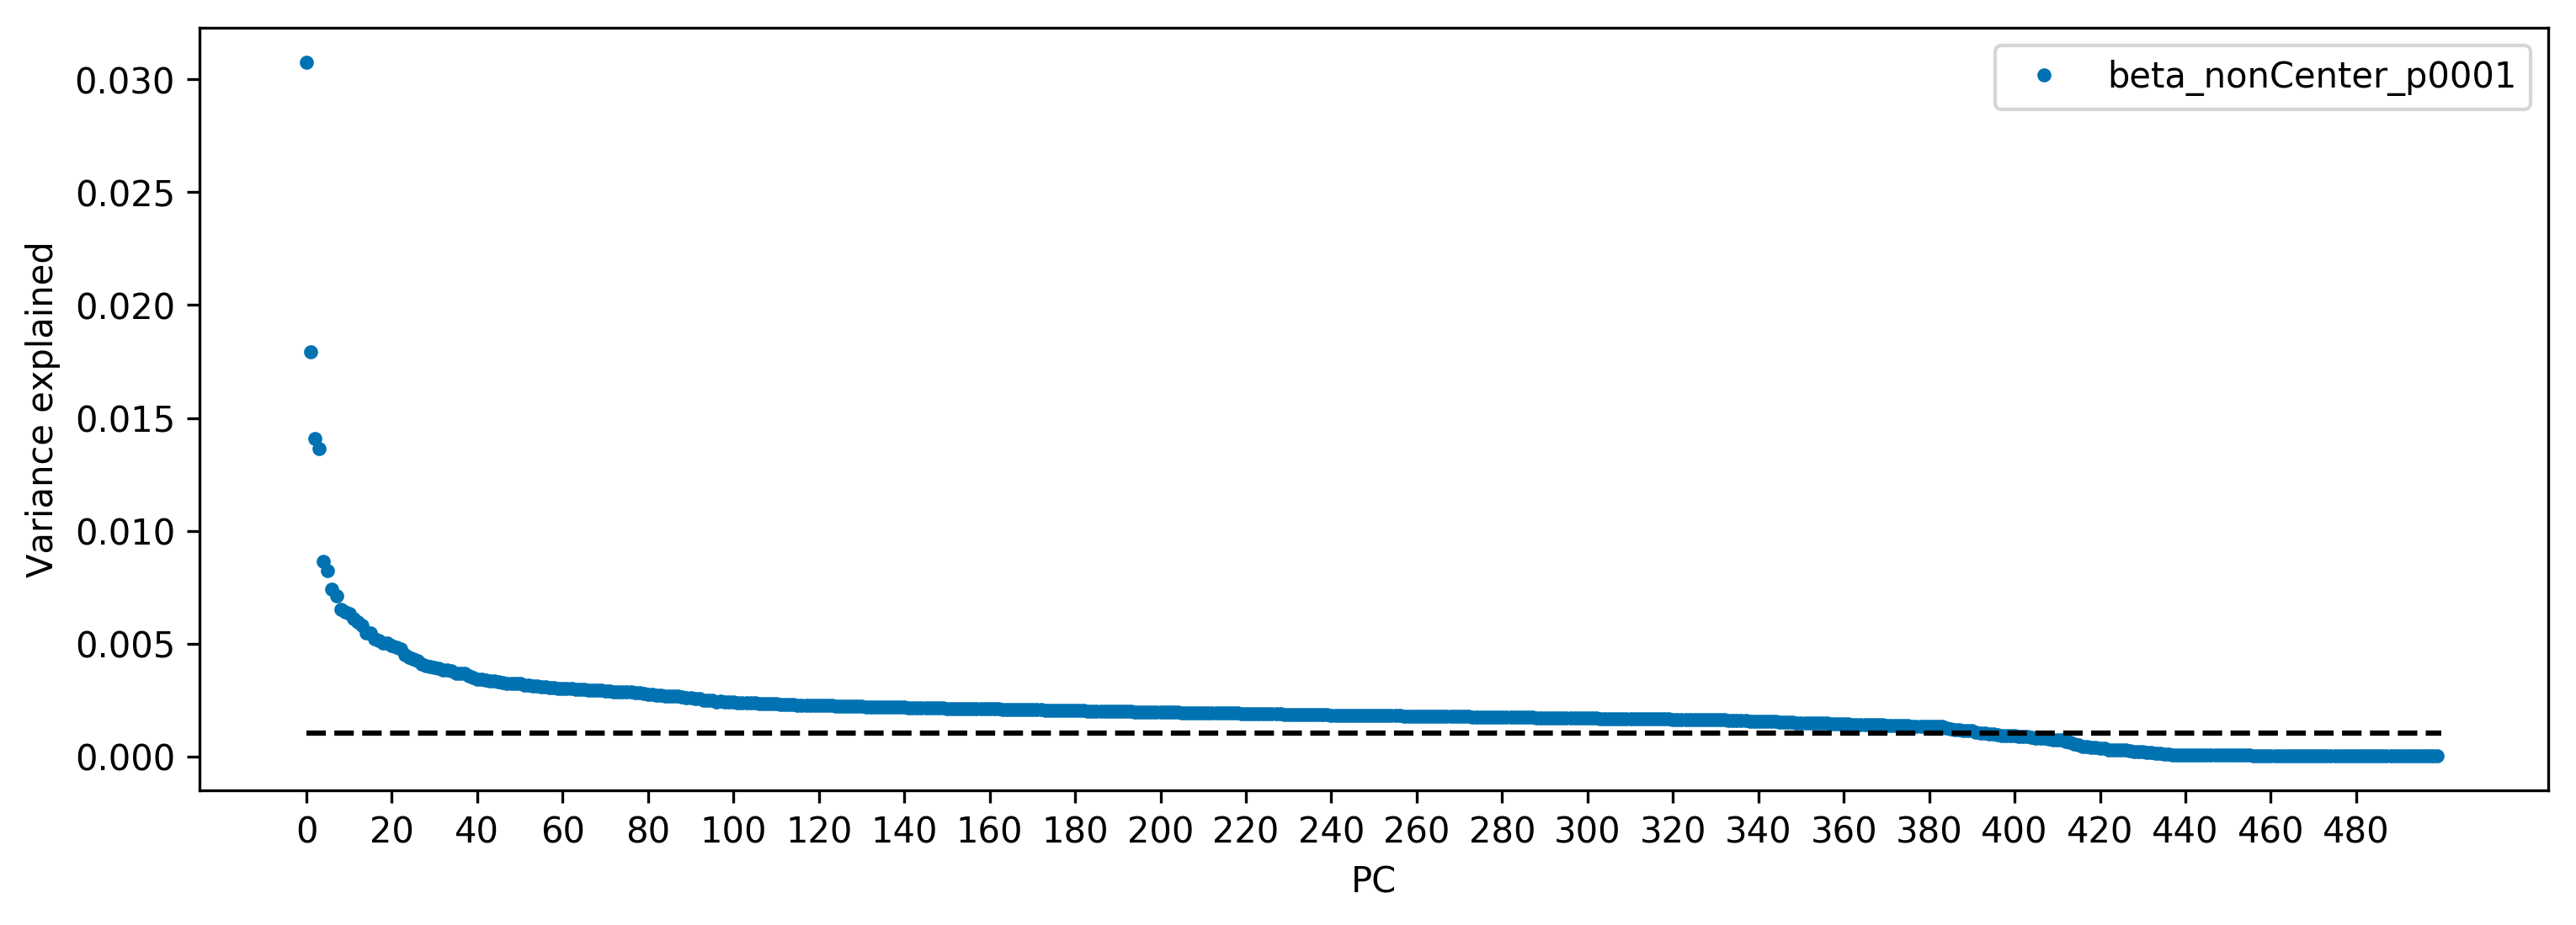

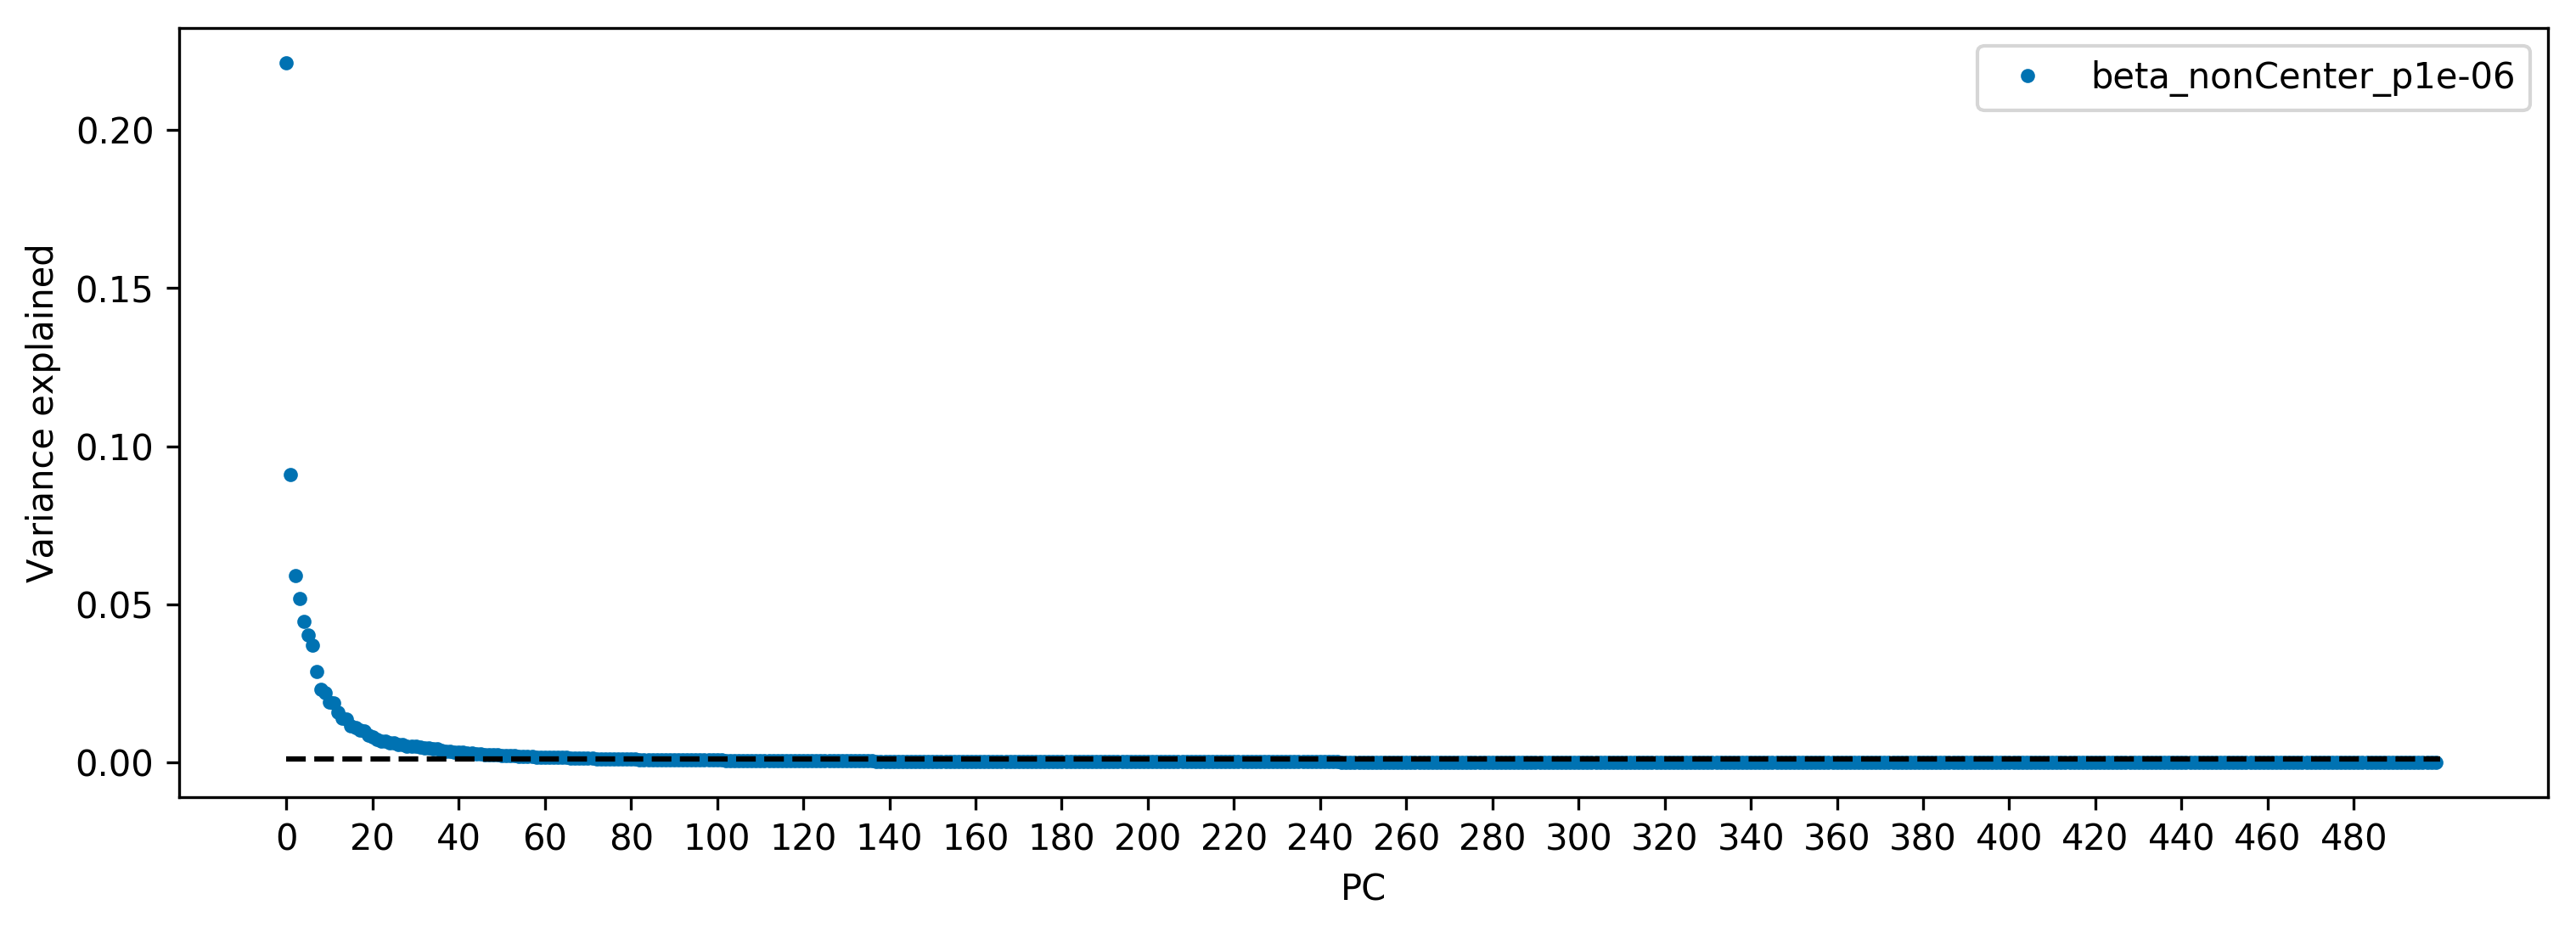

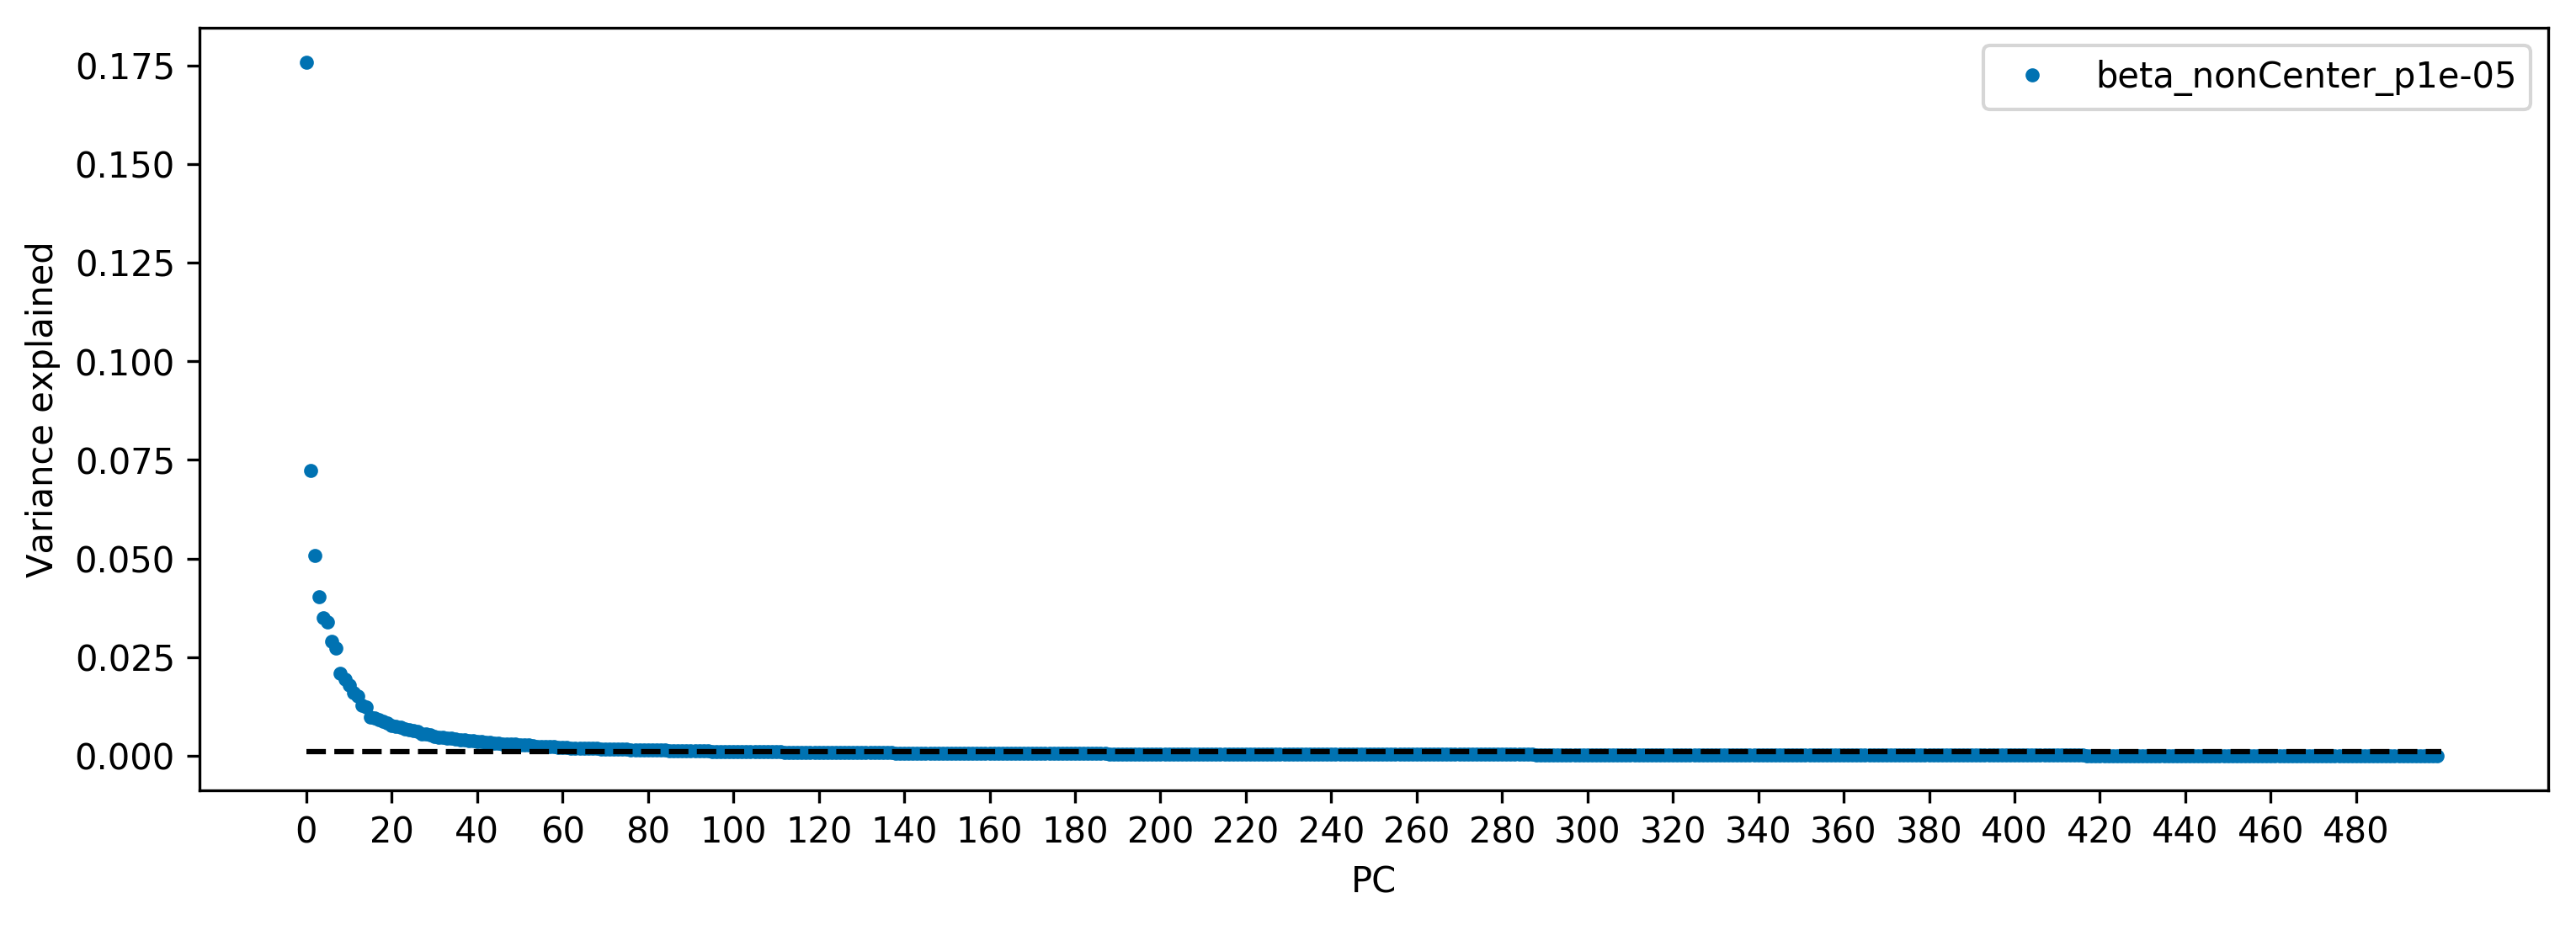

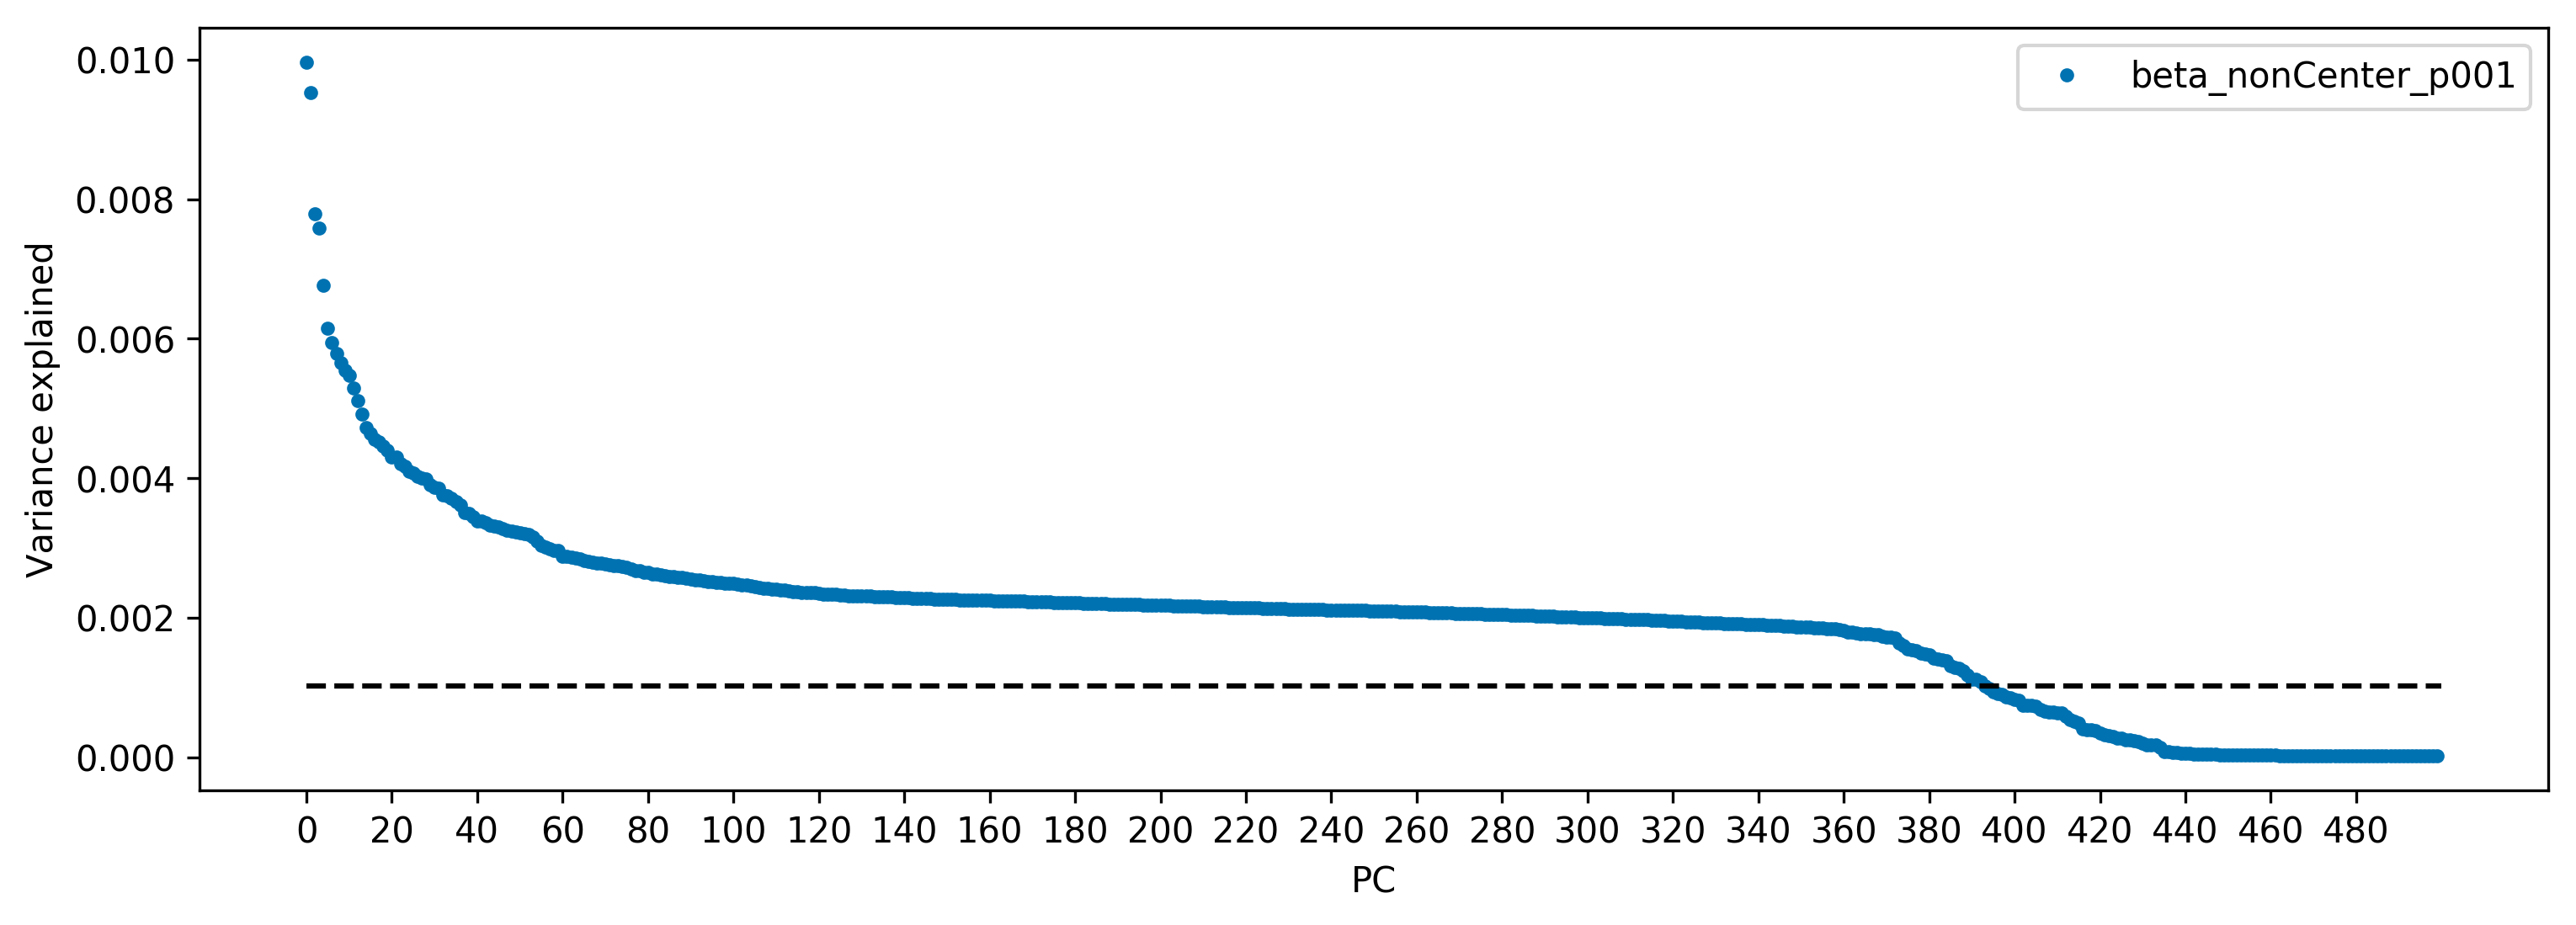

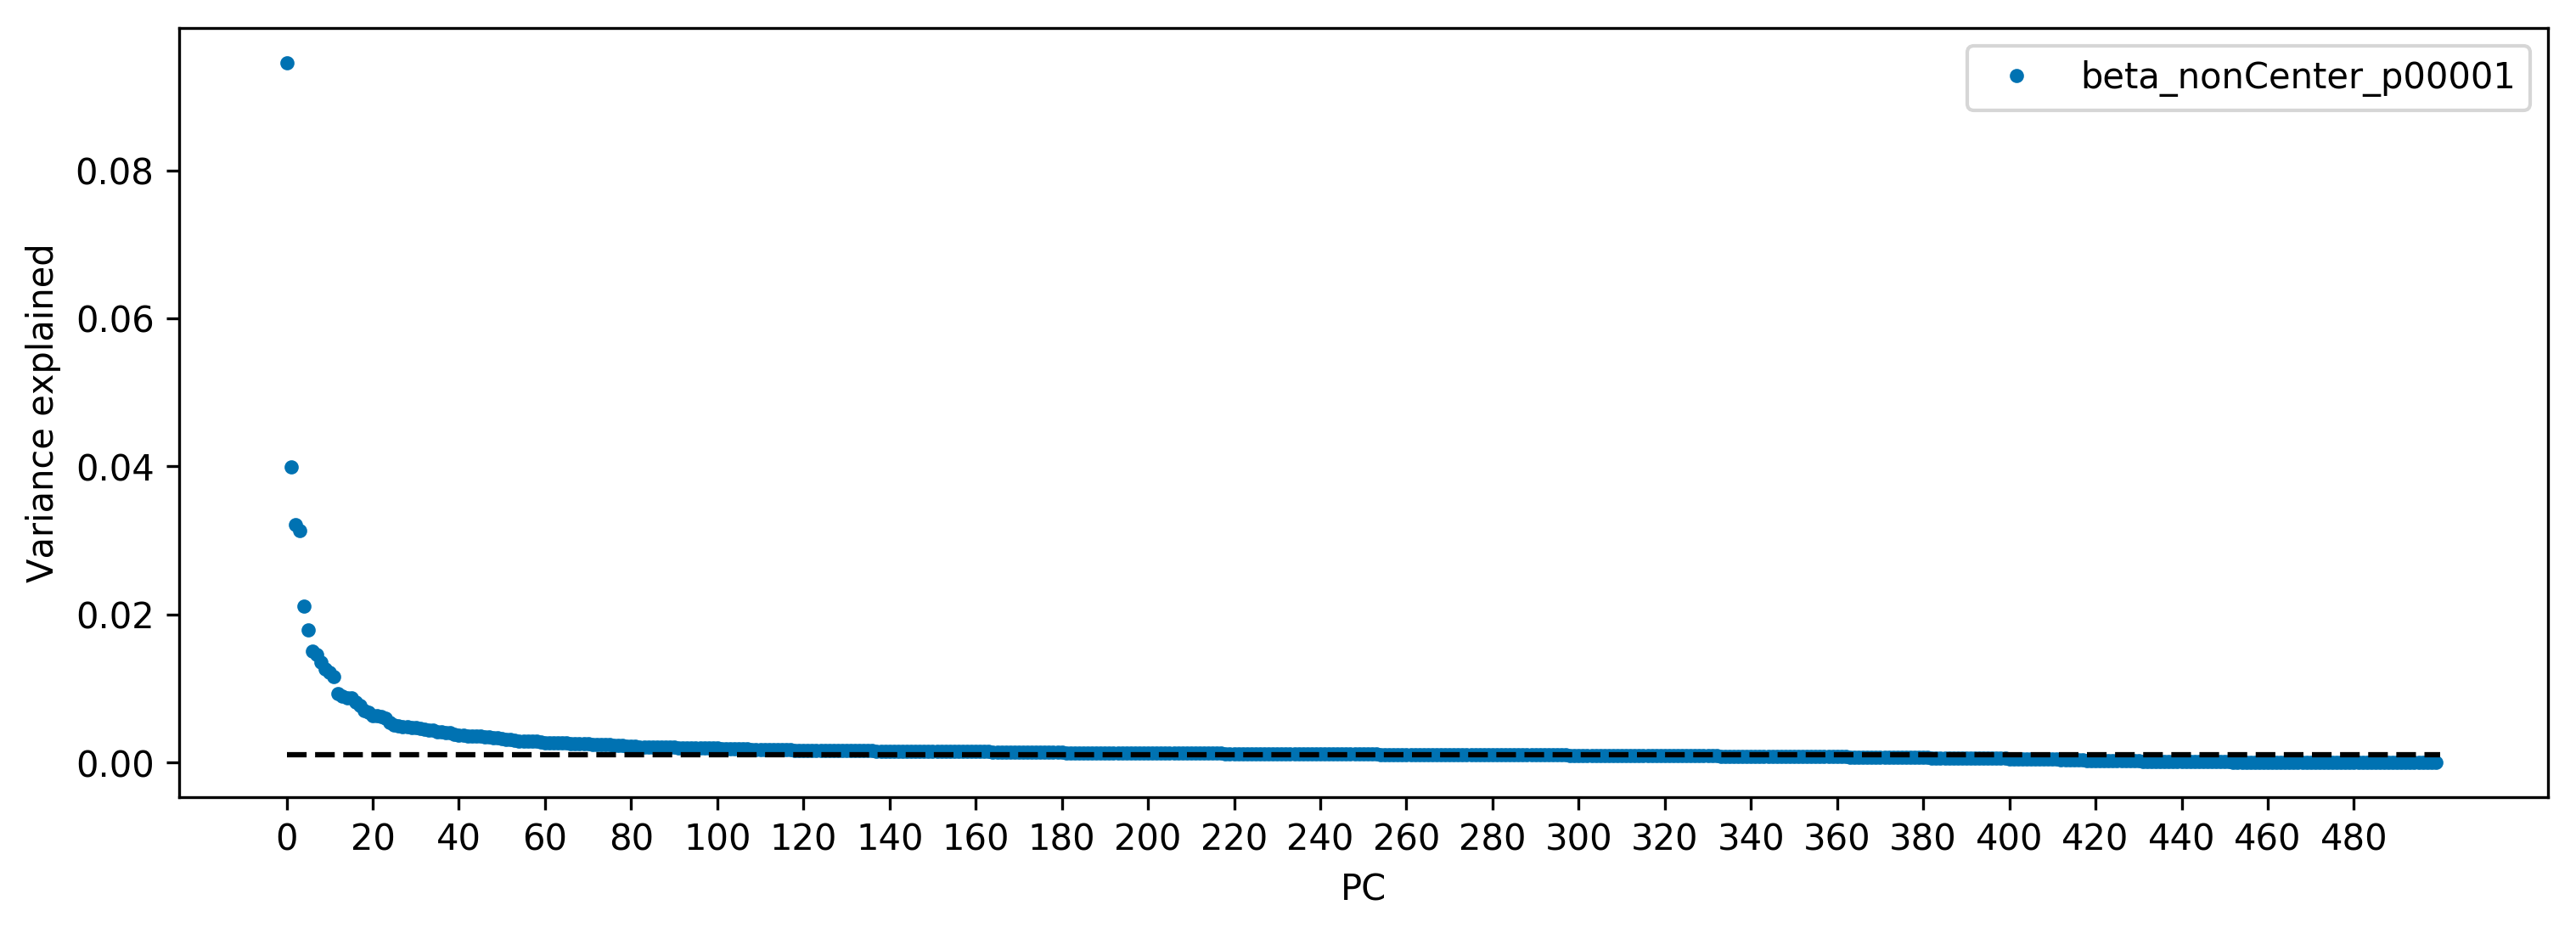

In [19]:
for npz in npzs:
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()